In [2]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from collections import Counter
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils import  GC,GC123,GC_skew
from Bio.SeqUtils import MeltingTemp as mt

#### Reading FASTA sequence

In [5]:
covid_record = SeqIO.read("covid.fasta","fasta")
covid_record

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [6]:
for record in SeqIO.parse("covid.fasta","fasta"):
    print(record)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


#### Extracting nucleotide sequence

In [7]:
covid_dna = covid_record.seq
print("DNA sequence :", covid_dna)

DNA sequence : ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGG

#### Lenght of extracted DNA sequence

In [9]:
len_dna = len(covid_dna)
print("Lenght of DNA sequence : ", len_dna, "bp")

Lenght of DNA sequence :  29903 bp


#### Transcription DNA -> mRNA

In [11]:
covid_mRna = covid_dna.transcribe()
print("mRna Sequence :", covid_mRna)

mRna Sequence : AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUG

#### Translation mRna --> Peptide chain

In [14]:
covid_pep = covid_mRna.translate()
print("Peptide chain :", covid_pep)

Peptide chain : IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*

#### frequency of nucleotide bases

Frequency of nucleotide bases:  Counter({'T': 9594, 'A': 8954, 'G': 5863, 'C': 5492})


<BarContainer object of 4 artists>

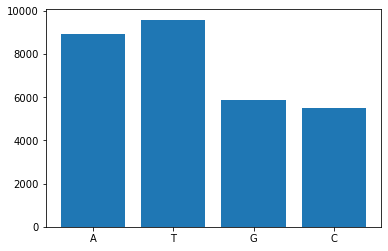

In [16]:
covid_Ncount = Counter(covid_dna)
print("Frequency of nucleotide bases: ", covid_Ncount)

plt.bar(covid_Ncount.keys(),covid_Ncount.values())

#### Molecular weight of Dna

In [21]:
dna_mw = molecular_weight(covid_dna)
print("Molecular weight : ", "%.2f" % dna_mw)

Molecular weight :  9241219.21


#### Guanine cytosine percent

In [23]:
dna_gc = GC(covid_dna)
print("Percentage of GC: ", "%.2f" % GC(covid_dna),"%")

Percentage of GC:  37.97 %


#### Adenine Thymine content

In [24]:
def at_content(seq):
  result = float(seq.count('A')+ seq.count('T'))/len(seq)*100
  return result
print("Percentage of AT: ", "%.2f" % at_content(covid_dna), "%")

Percentage of AT:  62.03 %


#### lagging and leading strand

In [25]:
GC_skew(covid_dna)

[-0.2631578947368421,
 -0.022222222222222223,
 0.07692307692307693,
 0.05660377358490566,
 0.09090909090909091,
 0.19230769230769232,
 0.08695652173913043,
 0.08695652173913043,
 -0.04,
 0.1111111111111111,
 0.0625,
 0.07692307692307693,
 0.09090909090909091,
 0.02702702702702703,
 0.06382978723404255,
 0.2608695652173913,
 -0.0625,
 0.15151515151515152,
 0.2,
 -0.1794871794871795,
 0.12195121951219512,
 0.2,
 0.2631578947368421,
 0.17647058823529413,
 0.05,
 0.024390243902439025,
 -0.02564102564102564,
 0.12195121951219512,
 0.3333333333333333,
 0.08108108108108109,
 0.2631578947368421,
 0.15,
 0.07692307692307693,
 0.2,
 0.3170731707317073,
 0.1282051282051282,
 -0.05555555555555555,
 0.0,
 0.25,
 0.15151515151515152,
 -0.3142857142857143,
 0.3333333333333333,
 0.18181818181818182,
 0.030303030303030304,
 0.02857142857142857,
 0.0,
 0.024390243902439025,
 -0.2777777777777778,
 -0.08571428571428572,
 0.05555555555555555,
 0.0,
 0.05263157894736842,
 -0.11764705882352941,
 -0.024390243

#### Melting point of Dna

In [26]:
dna_mt = mt.Tm_GC(covid_dna)
print("Melting temperature :", "%.2f" % dna_mt)

Melting temperature : 75.45


#### Frequency of Amino Acids

Frequency  of Amino Acids : Counter({'L': 886, 'S': 810, '*': 774, 'T': 679, 'C': 635, 'F': 593, 'R': 558, 'V': 548, 'Y': 505, 'N': 472, 'I': 436, 'K': 413, 'G': 394, 'A': 375, 'H': 332, 'Q': 325, 'P': 292, 'D': 290, 'E': 270, 'W': 263, 'M': 117})


<BarContainer object of 21 artists>

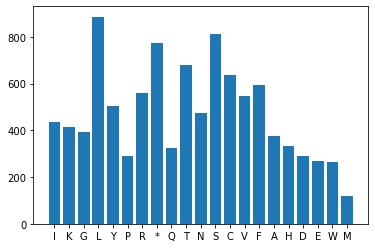

In [28]:
from collections import Counter
covid_pr_freq = Counter(covid_pep)
print("Frequency  of Amino Acids :",covid_pr_freq)

plt.bar(covid_pr_freq.keys(),covid_pr_freq.values())

#### Most Common Amino acids 

In [29]:
print("Most Common Amino acids:",Counter(covid_pep).most_common(5))

Most Common Amino acids: [('L', 886), ('S', 810), ('*', 774), ('T', 679), ('C', 635)]


#### 